In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("car_purchase.csv")

In [3]:
df.head()

,customer_id,gender,age,annual_salary,credit_card_debt,net_worth,max_purchase_amount
0,1,F,42,62812.09,11609.38,238961.25,35321.46
1,2,F,41,66646.89,9572.96,530973.91,45115.53
2,3,M,43,53798.55,11160.36,638467.18,42925.71
3,4,M,58,79370.04,14426.16,548599.05,67422.36
4,5,M,57,59729.15,5358.71,560304.07,55915.46


In [4]:
df.tail()

,customer_id,gender,age,annual_salary,credit_card_debt,net_worth,max_purchase_amount
395,396,M,35,61723.01,9913.19,291897.41,30757.66
396,397,F,55,72310.40,3093.71,724025.41,65592.22
397,398,F,37,67548.77,10462.36,388284.30,37871.71
398,399,F,48,62175.69,12967.28,343290.68,42919.52
399,400,F,32,60584.85,8133.46,129635.63,22599.46


In [5]:
df.describe()

,customer_id,age,annual_salary,credit_card_debt,net_worth,max_purchase_amount
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,46.345000,61996.506450,9713.518250,435396.144475,44363.875700
std,115.614301,7.871523,11679.246855,3412.761433,176477.556299,10614.581382
min,1.000000,22.000000,20000.000000,632.050000,20000.000000,10092.230000
25%,100.750000,41.000000,53985.417500,7522.535000,308946.260000,37882.342500
50%,200.500000,46.000000,62755.175000,9767.390000,430765.990000,43997.785000
75%,300.250000,51.250000,70066.840000,11904.000000,564077.677500,51442.082500
max,400.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
df.drop("customer_id",inplace=True,axis=1)
df.head()

,gender,age,annual_salary,credit_card_debt,net_worth,max_purchase_amount
0,F,42,62812.09,11609.38,238961.25,35321.46
1,F,41,66646.89,9572.96,530973.91,45115.53
2,M,43,53798.55,11160.36,638467.18,42925.71
3,M,58,79370.04,14426.16,548599.05,67422.36
4,M,57,59729.15,5358.71,560304.07,55915.46


In [8]:
one_hot = pd.get_dummies(df["gender"])
df.drop("gender",axis=1,inplace=True)
df = df.join(one_hot)
df.head()

,age,annual_salary,credit_card_debt,net_worth,max_purchase_amount,F,M
0,42,62812.09,11609.38,238961.25,35321.46,1,0
1,41,66646.89,9572.96,530973.91,45115.53,1,0
2,43,53798.55,11160.36,638467.18,42925.71,0,1
3,58,79370.04,14426.16,548599.05,67422.36,0,1
4,57,59729.15,5358.71,560304.07,55915.46,0,1


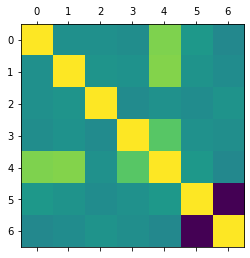

In [9]:
plt.matshow(df.corr())
plt.show()

In [10]:
y = df["max_purchase_amount"]
df.drop("max_purchase_amount",axis=1,inplace=True)

In [11]:
df.head()

,age,annual_salary,credit_card_debt,net_worth,F,M
0,42,62812.09,11609.38,238961.25,1,0
1,41,66646.89,9572.96,530973.91,1,0
2,43,53798.55,11160.36,638467.18,0,1
3,58,79370.04,14426.16,548599.05,0,1
4,57,59729.15,5358.71,560304.07,0,1


In [12]:
df = df.to_numpy()
y = y.to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [14]:
from tqdm import tqdm

In [18]:
class LinearRegressionGradientDescent:
    def __init__(self,lr=0.1,iters=1000):
        self.__lr = lr
        self.__iters = iters
        self.__weights = None
        self.__bias = None

    def gradient_descent(self,m,x,y,yhat):
        dw = (1/m)*np.dot(x.T,(yhat-y))
        db = (1/m)*np.sum(yhat-y)

        self.__weights -= self.__lr*dw
        self.__bias -= self.__lr*db
    
    def loss(self,y,yhat,m):
        return (1/m) * np.sum((yhat-y)**2)

    def predict(self,x):
        return np.dot(x,self.__weights)+self.__bias

    def fit(self,x,y):
        n_samples, n_features = x.shape
        self.__weights = np.random.rand(n_features)
        self.__bias=0

        for _ in tqdm(range(self.__iters)):
            yhat = self.predict(x)
            loss = self.loss(y,yhat,n_samples)
            self.gradient_descent(n_samples,x,y,yhat)

        print(loss)

    def get_weights(self):
        return self.__weights

    def get_bias(self):
        return self.__bias


        

In [19]:
model1 = LinearRegressionGradientDescent()
model1.fit(x_train,y_train)

100%|██████████| 1000/1000 [00:00<00:00, 20559.00it/s]

54929.176335955344


In [20]:
predictions1 = model1.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test,predictions1))

60977.19272458679


In [23]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train,y_train)


LinearRegression()

In [24]:
predictions2 = model2.predict(x_test)
print(mean_squared_error(y_test,predictions2))

60977.192724585955


In [25]:
model1.get_weights()

array([6461.90979262, 6608.76079961,   26.23673774, 5143.75453154,
        -12.58274701,   12.64231566])

In [26]:
model1.get_bias()

44109.23053124996